# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = '/Users/sharbatc/Academia/Courses/Currently Learning/ada/ADA2017-Tutorials/02 - Intro to Pandas/Data'

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarking port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
filename = DATA_FOLDER+'/titanic.xls'
titanic = pd.read_excel(filename)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 


The types of each attribute are given below. It is meaningless to find out the range of attributes which are not numeric (`name`, `home.dest`) and hence we do not give the ranges of these attributes. 

In [5]:
typeframe = titanic.dtypes.to_frame()
typeframe.rename(columns = {0:'data type'})

,data type
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [6]:
titanic_max = titanic.select_dtypes(exclude = ['object']).apply(lambda x: x.max()).to_frame().rename(columns = {0:'max'})
titanic_min = titanic.select_dtypes(exclude = ['object']).apply(lambda x: x.min()).to_frame().rename(columns = {0:'min'})
titanic_range = titanic.select_dtypes(exclude = ['object']).apply(lambda x: x.max() - x.min()).to_frame().rename(columns = {0:'range'})

frames = [titanic_min, titanic_max, titanic_range]
pd.concat(frames,axis=1)

,min,max,range
pclass,1.0000,3.0000,2.0000
survived,0.0000,1.0000,1.0000
age,0.1667,80.0000,79.8333
sibsp,0.0000,8.0000,8.0000
parch,0.0000,9.0000,9.0000
fare,0.0000,512.3292,512.3292
body,1.0000,328.0000,327.0000


The `Categorical` attributes are `pclass`, `sex`, `survived`, `embarked`. We can choose `cabin` and `boat` as categories although there are too many elements in that category.

In [7]:
for col in ['pclass','sex','survived','embarked','cabin']:
    titanic[col] = titanic[col].astype('category') 

In [8]:
titanic.pclass.cat.categories = ['1st','2nd','3rd']
titanic.embarked.cat.categories = ['Cherbourg','Queenstown','Southampton']
titanic.survived.cat.categories = ['Perished','Survived']

In [9]:
typeframe = titanic.dtypes.to_frame()
typeframe.rename(columns = {0:'data type'})

,data type
pclass,category
survived,category
name,object
sex,category
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,category


### 2. Plot histograms for the *travel class*, *embarking port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

Before we move forward, we see from the questions that there is no use for a lot of the data stored in our `DataFrame` and so we choose to drop them altogether. We do not use `HierarchicalIndex` to upload the data in the previous case.

In [10]:
titanic.drop(['name', 'sibsp','parch','ticket','fare','boat','body','home.dest'], axis=1, inplace=True)
titanic.head()

,pclass,survived,sex,age,cabin,embarked
0,1st,Survived,female,29.0000,B5,Southampton
1,1st,Survived,male,0.9167,C22 C26,Southampton
2,1st,Perished,female,2.0000,C22 C26,Southampton
3,1st,Perished,male,30.0000,C22 C26,Southampton
4,1st,Perished,female,25.0000,C22 C26,Southampton


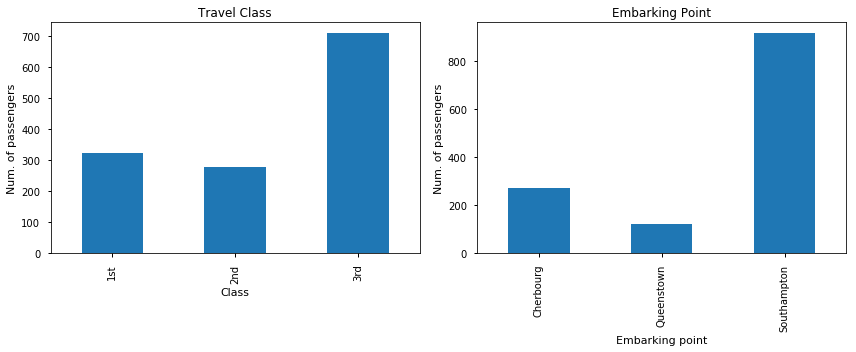

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,5))

titanic['pclass'].value_counts(sort=False).plot(kind='bar', ax = axes[0], title = 'Travel Class')
axes[0].set_ylabel('Num. of passengers')
axes[0].set_xlabel('Class')

titanic['embarked'].dropna().value_counts(sort=False).plot(kind='bar', ax = axes[1], title = 'Embarking Point')
axes[1].set_ylabel('Num. of passengers')
axes[1].set_xlabel('Embarking point')
plt.tight_layout()

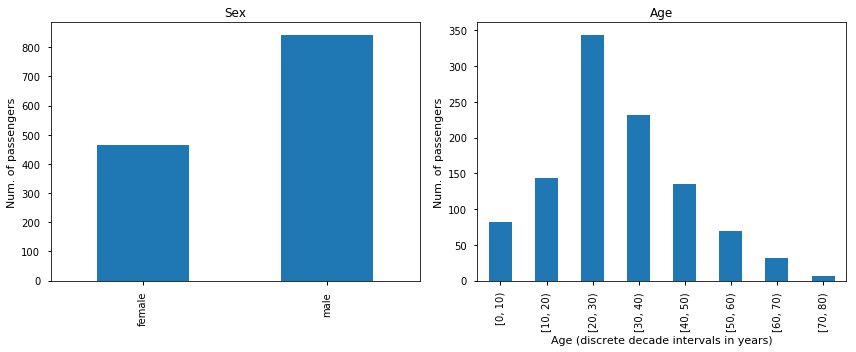

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,5))

titanic['sex'].value_counts(sort=False).plot(kind='bar', ax = axes[0], title = 'Sex')
axes[0].set_ylabel('Num. of passengers')

step = 10 #decades
bin_range = np.arange(0, titanic['age'].max()+step, step)
out, bins  = pd.cut(titanic['age'].dropna(), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot(kind = 'bar', ax = axes[1], title = 'Age')
axes[1].set_xlabel('Age (discrete decade intervals in years)')
axes[1].set_ylabel('Num. of passengers')

plt.tight_layout()

### 3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

The labels of cabin numbers shown in the `titanic.html` file gives us an idea that there are some passengers (super rich people for sure) who booked more than one room. In all of the cases, they are on the same floor except for a few cases in which we have a spurious floor `F` in front of cabins on other floors. The floor id `F` is not even followed by a number. We thought of removing those and taking the other room which is followed by a number. 

We also removed the floor `T` which is a single entity, because although there does exist a *tank top*, it is not a deck as shown from the website below. (We are not responsible for the ads which pop up on it)

In [13]:
from IPython.display import IFrame

IFrame('https://www.encyclopedia-titanica.org/titanic-deckplans/tank-top.html', width=800, height=300)

In [14]:
titanic_cabin = titanic['cabin'].dropna().apply(lambda x: x[2:] if \
                                                (x.startswith("F ") or x.startswith("T"))\
                                                else str(x))

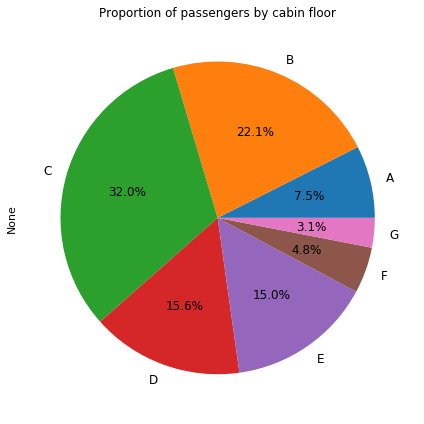

In [15]:
titanic_cabin.groupby([titanic_cabin.str[0]]).size().plot(kind = 'pie',\
                                                       title = 'Proportion of passengers by cabin floor',\
                                                       autopct='%1.1f%%', fontsize=12, figsize = (6,6))
plt.tight_layout()

### 4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.

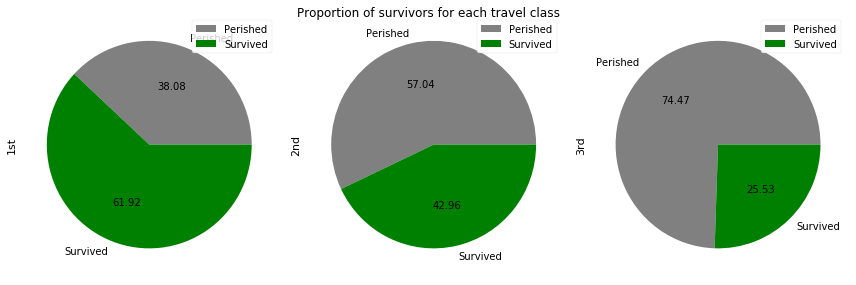

In [16]:
prop_survived = titanic.groupby(['survived','pclass']).size().unstack(fill_value=0)
prop_survived.plot(kind = 'pie',\
                   subplots = True,\
                   title = 'Proportion of survivors for each travel class',\
                   use_index = False,\
                   autopct='%.2f',\
                   colors = ['grey','green'],\
                   figsize=(12,4))

plt.tight_layout()

So, when it comes to class war, we do see that there is a larger proportion of surviving (61.92%) first class passengers, as compared to third class passengers (25.53%)

### 5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

None of the columns among `survived`, `pclass` or `sex` have any missing values. That's good news. 

In [17]:
def calc_prop_sur(df):
    perished, survived = df['survived'].value_counts()[0], df['survived'].value_counts()[1]
    return survived/(perished+survived)

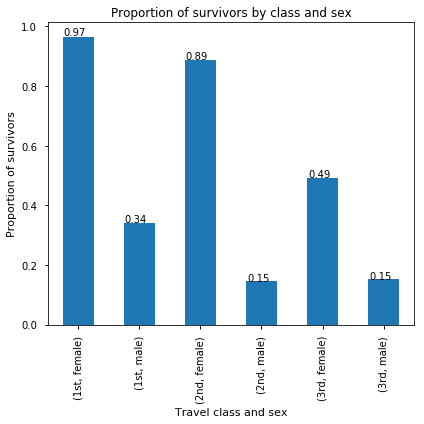

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (6,6))

prop_survived_class = titanic.groupby(['pclass','sex']).apply(calc_prop_sur).plot(kind='bar', \
                                                            title = 'Proportion of survivors by class and sex')

for p in axes.patches:
    axes.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

axes.set_xlabel('Travel class and sex')
axes.set_ylabel('Proportion of survivors')
plt.tight_layout()

### 6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [19]:
med = titanic['age'].dropna().median()
titanic['age_gt_med'] = ((titanic['age'].dropna())>= med)
titanic['age_gt_med'] = titanic['age_gt_med'].astype('category') 
titanic.age_gt_med.cat.categories = ['Greater than {}'.format(med),'Less than {}'.format(med)]

In [20]:
prop_survived_class = titanic.groupby(['age_gt_med','pclass','sex']).apply(calc_prop_sur).\
                                                to_frame().rename(columns = {0:'proportion'})
prop_survived_class

proportion
age_gt_med        pclass sex               
Greater than 28.0 1st    female    0.950000
                         male      0.535714
                  2nd    female    0.901961
                         male      0.235294
                  3rd    female    0.528302
                         male      0.194313
Less than 28.0    1st    female    0.967742
                         male      0.308943
                  2nd    female    0.884615
                         male      0.077778
                  3rd    female    0.347826
                         male      0.130435

In [21]:
prop_survived_class.index.is_unique

True